In [34]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

sns.set_style("white")

In [2]:
df_train = pd.read_csv("./timing_train.csv")
df_train.head(5)

,timestamp,task,name,seed,duration
0,2024-05-20 11:58:05.453,train,baseline,43,184.128798
1,2024-05-20 11:46:18.206,train,integrated,43,835.209234


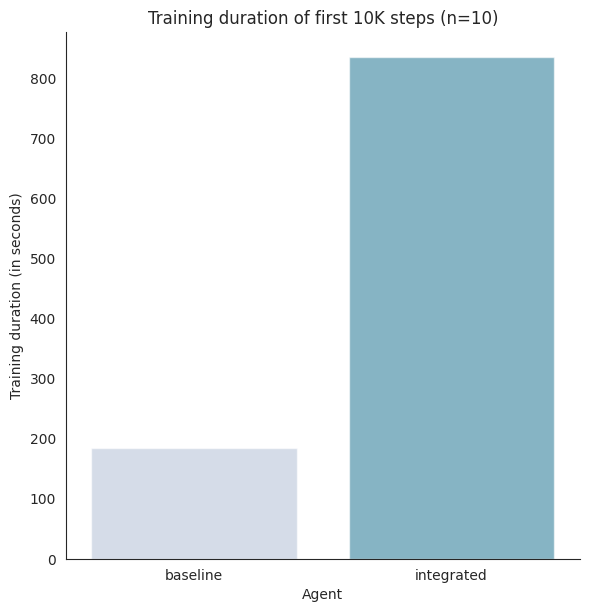

In [3]:
sns.set_style("white")
sns.catplot(data=df_train, kind="bar", x="name", y="duration", errorbar=None, alpha=.6, hue='name', palette='PuBuGn', height=6).set(title="Training duration of first 10K steps (n=10)", xlabel="Agent", ylabel="Training duration (in seconds)")

In [4]:
df_steps = pd.read_csv("./timing_step.csv")
df_steps.head(5)

,timestamp,task,name,seed,duration
0,2024-05-20 11:55:01.335,steps,baseline,43,0.009771
1,2024-05-20 11:55:01.343,steps,baseline,43,0.008574
2,2024-05-20 11:55:01.352,steps,baseline,43,0.008574
3,2024-05-20 11:55:01.361,steps,baseline,43,0.008555
4,2024-05-20 11:55:01.369,steps,baseline,43,0.008588


[Text(0.5, 1.0, 'Duration of a single step per, per agent'),
 Text(0.5, 0, 'Agent'),
 Text(0, 0.5, 'Duration (in milliseconds)')]

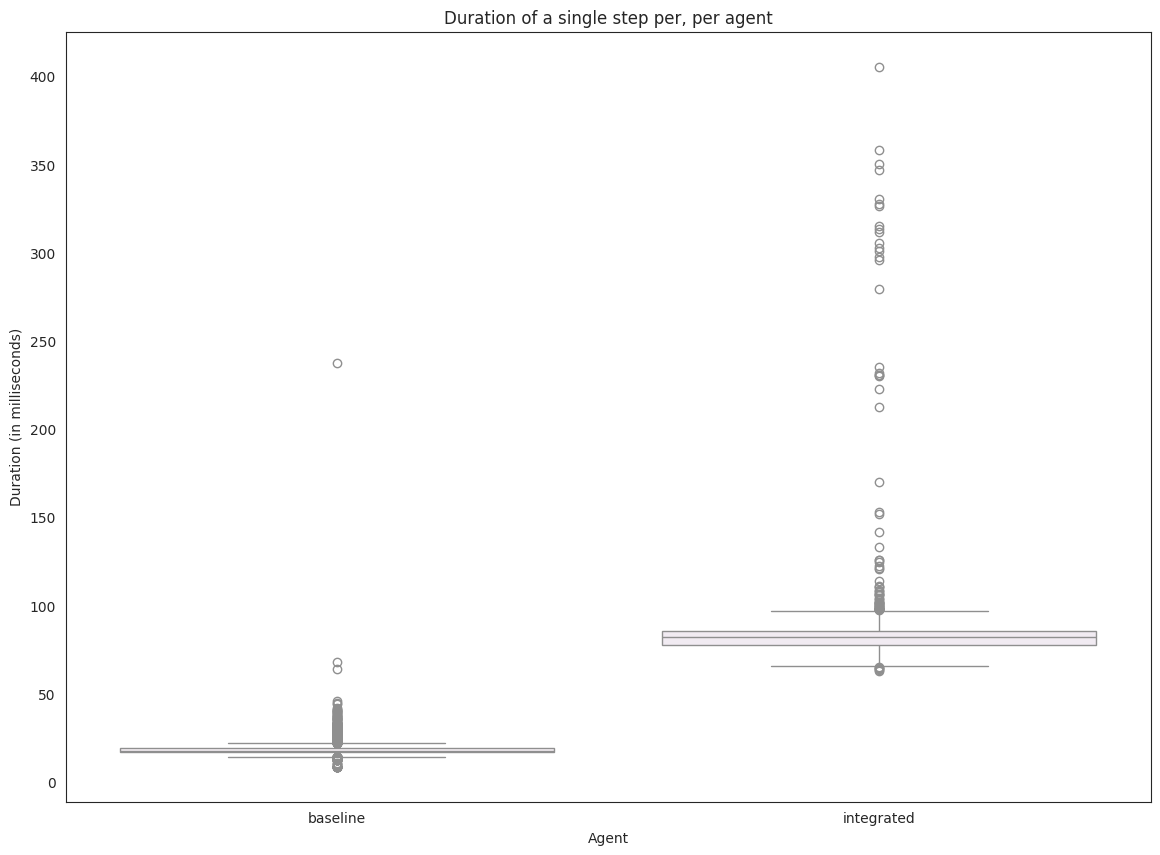

In [5]:
df_steps["duration_millis"] = df_steps["duration"] * 1000
plt.figure(figsize=(14, 10))
sns.set_style("white")
sns.set_palette(palette='PuBuGn', desat=0.9, n_colors=23)
sns.boxplot(x ="name", y="duration_millis", data = df_steps, hue="name", legend=False).set(title='Duration of a single step per, per agent', xlabel="Agent", ylabel="Duration (in milliseconds)")

Compare the agents with a one-sided t-test, in incremental order.
As the environment always finishes an episode, the datasets are of unequal length. Sample 10.000 datapoints from each before applying the t-test

In [38]:
df_steps_baseline = df_steps[df_steps["name"] == "baseline"].sample(10000, random_state=1)
df_steps_integrated = df_steps[df_steps["name"] == "integrated"].sample(10000, random_state=1)
df_steps_baseline.describe()

,seed,duration,duration_millis
count,10000.0,10000.000000,10000.000000
mean,43.0,0.018227,18.227235
std,0.0,0.003314,3.313790
min,43.0,0.008555,8.555150
25%,43.0,0.017116,17.115655
50%,43.0,0.017674,17.673645
75%,43.0,0.019119,19.118615
max,43.0,0.237658,237.658360


In [39]:
df_steps_integrated.describe()

,seed,duration,duration_millis
count,10000.0,10000.000000,10000.000000
mean,43.0,0.081505,81.505096
std,0.0,0.012083,12.083140
min,43.0,0.062995,62.995160
25%,43.0,0.077434,77.434337
50%,43.0,0.082005,82.005010
75%,43.0,0.085375,85.375208
max,43.0,0.405410,405.410100


Perform a one-sided t-test using the following hypotheses:

Null: the mean step duration of the integrated agent is not larger than the mean step duration of the baseline.
Alternative: the mean step duration of the integrated agent is larger than the mean step duration of the baseline.

In [42]:
stats.ttest_ind(df_steps_integrated["duration_millis"], df_steps_baseline["duration_millis"], alternative='greater')

TtestResult(statistic=505.0388902660388, pvalue=0.0, df=19998.0)

With a p-value < 0.05, we can reject the null-hypothesis and conclude that the mean step duration of the integrated agent is larger than the mean step duration of the baseline. This seems somewhat trivial in this case, but this may not be true in the subsequent comparisons.

In [6]:
df_symbolic = pd.read_csv("./timing_symbolic.csv")
df_symbolic.head(5)

,timestamp,task,name,seed,duration
0,2024-05-20 11:32:23.065,track_action,integrated,43,0.000019
1,2024-05-20 11:32:23.138,track_action,integrated,43,0.000018
2,2024-05-20 11:32:23.205,track_action,integrated,43,0.000018
3,2024-05-20 11:32:23.274,track_action,integrated,43,0.000037
4,2024-05-20 11:32:23.346,track_action,integrated,43,0.000020


In [7]:
# track_action is trivial. It isn't symbolic in the first place. Delete.
df_symbolic.drop(df_symbolic[df_symbolic.task == "track_action"].index, inplace=True)
df_symbolic.head(5)

,timestamp,task,name,seed,duration
10193,2024-05-20 11:33:34.590,try_induction,integrated,43,0.006414
10194,2024-05-20 11:34:51.254,try_induction,integrated,43,0.003992
10195,2024-05-20 11:36:08.848,try_induction,integrated,43,0.005736
10196,2024-05-20 11:37:30.043,try_induction,integrated,43,0.005932
10197,2024-05-20 11:38:52.689,try_induction,integrated,43,0.005833


In [8]:
df_object_detection_P1 = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/symbolic/20240502-16.09.35_P1_detect_objects.csv", header=None)
# add column names
df_object_detection_P1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_object_detection_P1["name"] = "P1"

In [9]:
df_object_detection_C1 = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/symbolic/20240430-12.00.19_C1_detect_objects.csv", header=None)
# add column names
df_object_detection_C1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_object_detection_C1["name"] = "C1"

In [10]:
df_positioning_P1 = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/symbolic/20240502-16.09.35_P1_position_objects.csv", header=None)
# add column names
df_positioning_P1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_positioning_P1["name"] = "P1"

In [11]:
df_positioning_C1 = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/symbolic/20240430-12.00.19_C1_position_objects.csv", header=None)
# add column names
df_positioning_C1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_positioning_C1["name"] = "C1"

In [12]:
df_induction_P1 = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/symbolic/20240502-16.09.35_P1_try_induction.csv", header=None)
# add column names
df_induction_P1.columns =['timestamp', 'task', 'name', 'seed', 'episode','step', 'duration']
df_induction_P1["name"] = "P1"

In [13]:
df_induction_C1 = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/symbolic/20240430-12.00.19_C1_try_induction.csv", header=None)
# add column names
df_induction_C1.columns =['timestamp', 'task', 'name', 'seed', 'episode','step','duration']
df_induction_C1["name"] = "C1"

In [14]:
df_choose_action_P1 = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/symbolic/20240502-16.09.35_P1_choose_action_ddqn.csv", header=None)
# add column names
df_choose_action_P1.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_choose_action_P1["name"] = "P1"

In [15]:
df_choose_action_C1 = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/symbolic/20240430-12.00.19_C1_choose_action_ddqn.csv", header=None)
# add column names
df_choose_action_C1.columns =['timestamp', 'task', 'seed', 'duration']
df_choose_action_C1["name"] = "C1"
df_choose_action_C1.head(5)

,timestamp,task,seed,duration,name
0,2024-04-30 12:00:21.014,choose_action_ddqn,1,0.000356,C1
1,2024-04-30 12:00:21.045,choose_action_ddqn,1,0.000425,C1
2,2024-04-30 12:00:21.075,choose_action_ddqn,1,0.000402,C1
3,2024-04-30 12:00:21.101,choose_action_ddqn,1,0.000349,C1
4,2024-04-30 12:00:21.126,choose_action_ddqn,1,0.000353,C1


In [16]:
df_baseline_step = pd.read_csv("../results/20240428-20.22.58_baseline_B2/logs/timing/20240428-20.22.58_baseline_B2_steps.csv", header=None)
df_baseline_step.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_baseline_step["name"] = "Baseline"

In [19]:
df_P1_step = pd.read_csv("../results/20240502-16.09.35_P1/logs/timing/20240502-16.09.35_P1_steps.csv", header=None)
df_P1_step.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_P1_step["name"] = "P1"

In [20]:
df_C1_step = pd.read_csv("../results/20240430-12.00.19_C1/logs/timing/20240430-12.00.19_C1_steps.csv", header=None)
df_C1_step.columns =['timestamp', 'task', 'name', 'seed', 'duration']
df_C1_step["name"] = "C1"

The core implementation portion of a P1 and C1 step is the total mean step duration minus all the symbolic mean durations.
For readability, calculate them first. The unit of measurement is in seconds, so multiply by 1000 to obtain milliseconds;
Note that the induction is only applied every 1OOO steps, meaning its proportion is 1/1000, canceling out the milliseconds conversion.

In [24]:
object_detection_P1 = df_object_detection_P1["duration"].mean() * 1000
positioning_P1 = df_positioning_P1["duration"].mean() * 1000
induction_P1 = df_induction_P1["duration"].mean()
choose_action_P1 = df_choose_action_P1["duration"].mean() * 1000
step_duration_P1 = df_P1_step["duration"].mean() * 1000
baseline_P1 = step_duration_P1 - (object_detection_P1 + positioning_P1 + induction_P1 + choose_action_P1)

object_detection_C1 = df_object_detection_C1["duration"].mean() * 1000
positioning_C1 = df_positioning_C1["duration"].mean() * 1000
induction_C1 = df_induction_C1["duration"].mean()
choose_action_C1 = df_choose_action_C1["duration"].mean() * 1000
step_duration_C1 = df_C1_step["duration"].mean() * 1000
baseline_C1 = step_duration_C1 - (object_detection_C1 + positioning_C1 + induction_C1 + choose_action_C1)

Text(0.5, 1.0, 'Anatomy of a single step by task')

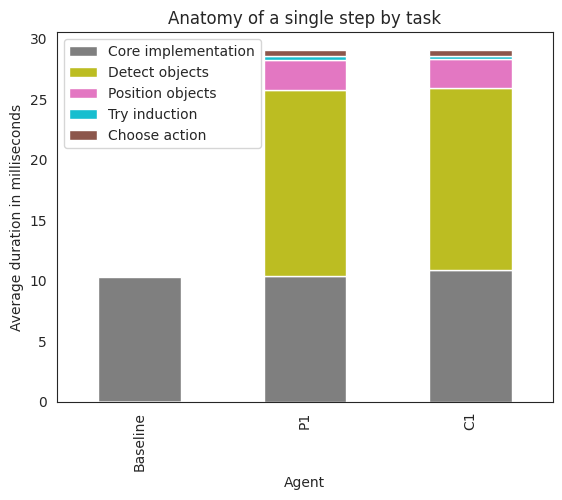

In [33]:
df = pd.DataFrame({'Core implementation': [df_baseline_step["duration"].mean() * 1000, baseline_P1, baseline_C1],
                   'Detect objects': [0, object_detection_P1, object_detection_C1],
                   'Position objects': [0, positioning_P1, positioning_C1],
                   'Try induction': [0, induction_P1, induction_C1],
                   'Choose action': [0, choose_action_P1, choose_action_C1]
                   },
                  index=['Baseline', 'P1', 'C1'])

# use the Tableau matte colours for high contrast and ease on the eyes
df.plot(kind='bar', stacked=True, color=['tab:gray', 'tab:olive', 'tab:pink', 'tab:cyan', 'tab:brown'])
 
# labels for x & y axis
plt.xlabel('Agent')
plt.ylabel('Average duration in milliseconds')
 
# title of plot
plt.title('Anatomy of a single step by task')